In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ds_gen import gen

In [4]:
ds, gs = gen([(0, 1), (6, 6)],
			 [1, 2],
			 [5, 10], shuffle_flag=True)
ds

array([[ 6.86875137,  5.71929201],
       [ 7.2056528 ,  8.48458838],
       [ 5.92309347,  5.97236682],
       [ 0.34826721,  2.13192001],
       [ 4.12297533,  5.5274815 ],
       [ 7.12187898,  2.85658016],
       [ 2.88101441,  5.02146536],
       [ 6.14499308,  7.72492971],
       [ 6.74930629,  6.84194316],
       [-0.52629839,  1.45352866],
       [ 8.07421607,  6.71369279],
       [-1.29782996,  2.61023388],
       [ 5.09095975,  8.18390249],
       [-1.08530523,  1.068363  ],
       [ 0.50847741,  2.91749   ]])

In [5]:
gs

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [6]:
dataset = {}

t_ds, t_gt = gen([(0, 1), (6, 6)],
				 [1, 2],
				 [5, 10], shuffle_flag=True)
dataset['train_samples'] = t_ds
dataset['train_labels'] = t_gt

t_ds, t_gt = gen([(0, 1), (6, 6)],
				 [1, 2],
				 [5, 10], shuffle_flag=True)
dataset['test_samples'] = t_ds
dataset['test_labels'] = t_gt

t_ds, t_gt = gen([(0, 1), (6, 6)],
				 [1, 2],
				 [10, 20], shuffle_flag=True)
dataset['available_pool_samples'] = t_ds
dataset['available_pool_labels'] = t_gt

In [7]:
from ActiveLearning import ActiveLearningPipeline

In [ ]:
threshold = 2

In [9]:
al = ActiveLearningPipeline(dataset=dataset, 
                            classifying_model="LogisticRegression", 
                            selection_criterion="entropy_e", 
                            weighted_selection=False, 
                            iterations=10, 
                            budget_per_iter=2, 
                            graph_building_function="euclidean", 
                            graph_threshold=threshold)

entropy_e


In [10]:
trained_model = al._train_model()
trained_model

LogisticRegression()

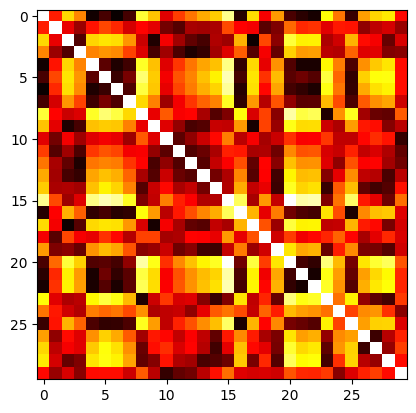

In [11]:
A = al.selection_criterion.graph_builder.similarity(al.available_pool_samples)
plt.imshow(A, cmap='hot')
plt.show()

In [12]:
E = np.vstack(np.where(A < threshold))
# E

In [13]:
nx_graph = nx.Graph()
nx_graph.add_nodes_from(range(len(al.available_pool_samples)))
nx_graph.add_edges_from(zip(*E))


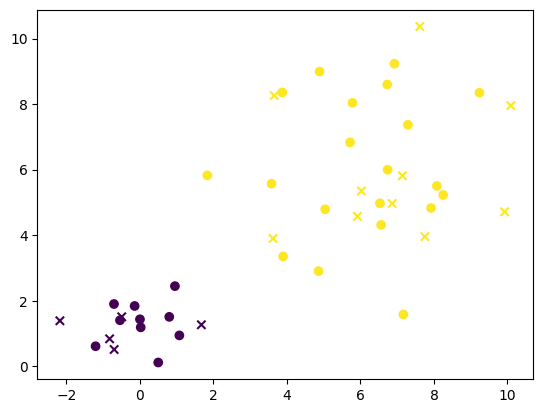

In [14]:
plt.scatter(al.available_pool_samples[:, 0], al.available_pool_samples[:, 1], c=al.available_pool_labels)
plt.scatter(al.train_samples[:, 0], al.train_samples[:, 1], c=al.train_labels, marker='x')

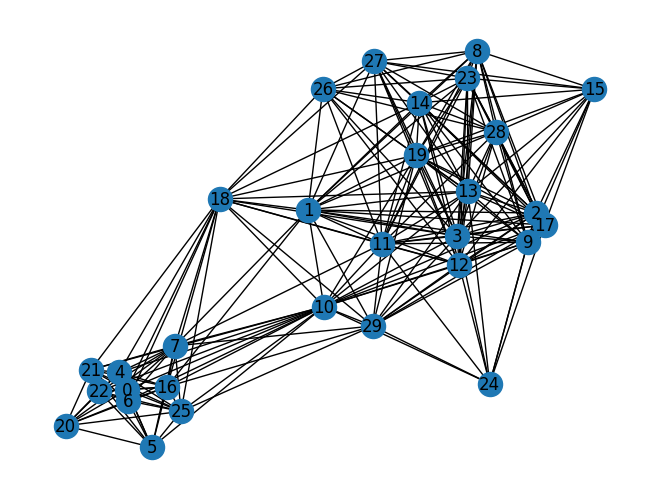

In [15]:
# pos = nx.spring_layout(nx_graph, k=.9, iterations=50)
pos = dict(zip(range(len(al.available_pool_samples)), al.available_pool_samples))
nx.draw(nx_graph, pos=pos, with_labels=True)


In [16]:
py_data, G = al.selection_criterion.graph_builder(al.available_pool_samples)
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [104]:
import torch

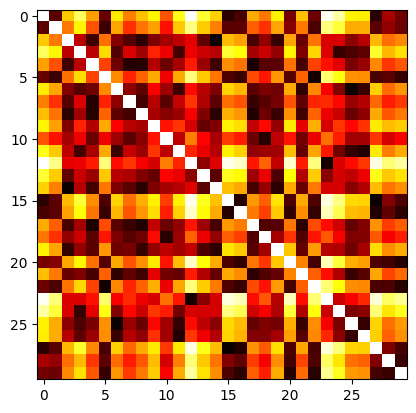

In [110]:
affine_matrix = al.selection_criterion.graph_builder.similarity(al.available_pool_samples)
plt.imshow(affine_matrix, cmap='hot')

In [119]:
E = np.vstack(np.where(affine_matrix < al.selection_criterion.graph_builder.threshold))
E

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 

In [120]:
range(len(al.available_pool_samples))

range(0, 30)

In [121]:

nx_graph = nx.Graph()
nx_graph.nodes

NodeView(())

In [122]:
nx_graph.add_nodes_from(range(len(al.available_pool_samples)))
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [118]:
# list(zip(*E))

In [123]:
nx_graph.add_edges_from(zip(*E))
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [124]:
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [ ]:


res = al.run_pipeline()

print(res)

entropy_e


100%|██████████| 10/10 [00:00<00:00, 72.87it/s, Accuracy=1]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
